# Exploration of original cases

In this notebook we explore the characteristics of the original artificial cases datasets. We aim to answer the following questions:
- How many cases are there?
- How long are they?
- How many unique tokens are there?
- Are all of they structured in the same way?

We also have some metadata about the cases containing the MeSH terms in it. We will explore the distribution of these terms in the cases.

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

main_path = "data/translated_dutch_geminiFlash15"

# Data Exploration

## Amount of data

In [2]:
n_cc = len(os.listdir(main_path))
print("There are {} clinical cases".format(n_cc))

There are 1000 clinical cases


In [3]:
def extract_txt(path, filename):
    total_path = os.path.join(path, filename)
    return filename, open(total_path, "r").read()

def files_to_df(path, extensions=["txt"]):
    files = [x for x in os.listdir(path) if x.split(".")[-1] in extensions]
    data = [extract_txt(path, f) for f in files]
    return pd.DataFrame(data, columns=["filename", "text"])

df = files_to_df(main_path)

In [4]:
df.head()

,filename,text
0,37829491_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...
1,34390221_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...
2,37861258_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...
3,29521319_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...
4,32330356_2_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...


In [5]:
df["n_char"] = df["text"].str.len()
df["n_words"] = df["text"].str.split(r"\n|\s").str.len()
df.head()

,filename,text,n_char,n_words
0,37829491_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2871,398
1,34390221_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,4501,559
2,37861258_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2542,320
3,29521319_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,2414,322
4,32330356_2_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2475,352


Text(0.5, 1.0, 'Number of words in clinical cases')

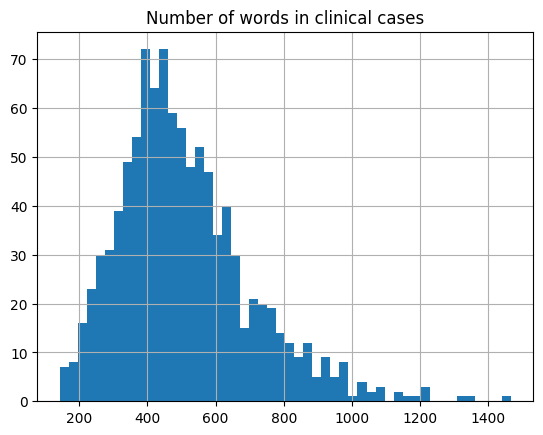

In [6]:
df["n_words"].hist(bins=50)
plt.title("Number of words in clinical cases")

In [7]:
df.describe()

,n_char,n_words
count,1000.000000,1000.000000
mean,3810.204000,508.870000
std,1444.890979,194.305501
min,1105.000000,143.000000
25%,2832.500000,378.750000
50%,3601.500000,475.000000
75%,4564.500000,611.000000
max,10832.000000,1466.000000


In [8]:
long_docs = df[df["n_words"] > 1500]

for i, row in long_docs.iterrows():
    print(row["filename"])
    print(row["text"])
    print("\n\n")

# Structure exploration

Some fields are created when the report is generated. Some interesting conclusions we can extract from below are:

- Not all the generated discharge summaries have the same amount of fields.
- The fields are usually structured as \*\*Section Name:\*\* followed by the content of the section.
- The content can be structured in different ways, some of them are structured in paragraphs, others in bullet points, etc.
- Unknown content is filled with placeholders like \[Datum van Opname\] instead of making it up
- There is some correlation between the amount of fields and the length of the case because it is possible that most of them have placeholders.

In [27]:
print(df.iloc[200]["text"])

## Ontslag Samenvatting

**Patiënt:** 74-jarige man

**Opnamedatum:** [Datum van Opname]

**Ontslagdatum:** [Datum van Ontslag]

**Reden voor Opname:** Primaire percutane coronaire interventie (pPCI) voor een volledig geoccludeerde proximale linker voorste dalende slagader.

**Procedure:** 
* Primaire percutane coronaire interventie (pPCI) voor een volledig geoccludeerde proximale linker voorste dalende slagader.
* Tijdens de procedure kon microvasculaire stroom distaal van de blokkade niet worden gevestigd (no-reflow fenomeen) en werd behandeld met diltiazem en nicorandil.

**Verloop in het Ziekenhuis:**
* **Dag 1:** Follow-up echocardiogram toonde een intraparietale echolucente apicolaterale neocaviteit die overeenkomt met een intramiocardiaal hematoom (IMH) samen met een verminderde ejectiefractie (EF) van 30% (baseline EF 45% per interventie).
* **1 Maand Follow-up:** Patiënt presenteerde zich met congestief hartfalen en verdere daling van de EF tot 25%. IMH was aan het oplossen, m

In [28]:
# Seems like all the fields are between ** so let's extract them
df["fields"] = df["text"].str.findall(r"\*\*([^\*]+):\*\*")
df["n_fields"] = df["fields"].str.len()
df

,filename,text,n_char,n_words,fields,n_fields
0,37829491_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2871,398,"[Patiënt, Geboortedatum, Medisch dossier numme...",23
1,34390221_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,4501,559,"[Patiënt, Datum van opname, Datum van ontslag,...",20
2,37861258_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2542,320,"[Patiënt, Datum van opname, Datum van ontslag,...",21
3,29521319_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,2414,322,"[Patiënt, Opnamedatum, Ontslagdatum, Reden voo...",14
4,32330356_2_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2475,352,"[Patiënt, Datum van opname, Datum van ontslag,...",11
...,...,...,...,...,...,...
995,29563373_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2949,364,"[Patiënt, Geboortedatum, Medisch dossier numme...",22
996,37085890_1_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,5271,739,"[Patiënt, Geboortedatum, Datum van opname, Dat...",21
997,31368900_1_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,1603,213,"[Patiënt, Datum van opname, Datum van ontslag,...",13
998,35355435_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,7184,973,"[Patiënt, Geboortedatum, Datum van opname, Dat...",11


Text(0.5, 1.0, 'Number of fields in clinical cases')

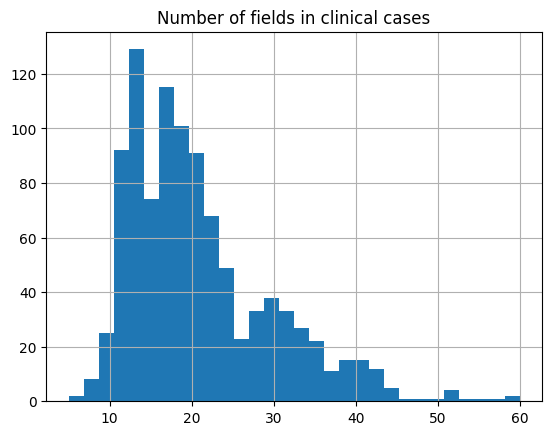

In [37]:
df["n_fields"].hist(bins=30)
plt.title("Number of fields in clinical cases")

In [30]:
df[df["n_fields"] >=50]

,filename,text,n_char,n_words,fields,n_fields
76,38552076_transformed.txt,## Ontslagverslag\n\n**Patiënt:** Mevrouw O.K....,9994,1325,"[Patiënt, Geboortedatum, Datum van opname, Dat...",51
287,31466989_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,4534,523,"[Patiënt, Geboortedatum, Medisch dossier numme...",52
340,31952503_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,6473,807,"[Patiënt, Geboortedatum, Chartnummer, Datum va...",55
385,31319486_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,5860,721,"[Patiënt, Geboortedatum, Medisch dossier numme...",58
494,34413281_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,5244,594,"[Patiënt, Datum van opname, Datum van ontslag,...",60
868,31533642_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,3527,402,"[Patiënt, Datum van opname, Datum van ontslag,...",54
875,29899452_1_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,6243,823,"[Patiënt, Geboortedatum, Medisch dossier numme...",50
913,32111708_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,8536,1189,"[Patiënt, Geboortedatum, Datum van opname, Dat...",51
957,32997782_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,7694,1024,"[Patiënt, Geboortedatum, Medisch dossier numme...",59
971,39044225_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,7162,972,"[Patiënt, Datum van opname, Reden voor opname,...",52


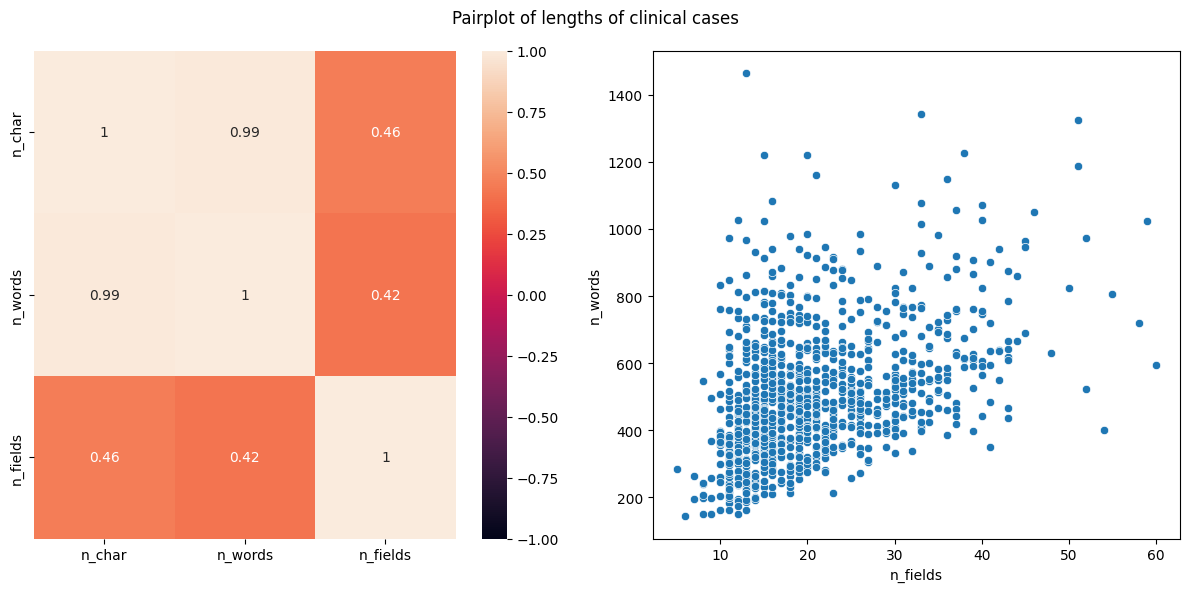

In [31]:
# Heatmap correlation matrix
import seaborn as sns
import numpy as np

cols = ["n_char", "n_words", "n_fields"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1])

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [36]:
df["placeholders"] = df["text"].str.findall(r"\[(.+)\]")
df["n_placeholders"] = df["placeholders"].str.len()
df

,filename,text,n_char,n_words,fields,n_fields,placeholders,n_placeholders
0,37829491_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2871,398,"[Patiënt, Geboortedatum, Medisch dossier numme...",23,"[Naam van de patiënt, Geboortedatum van de pat...",12
1,34390221_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,4501,559,"[Patiënt, Datum van opname, Datum van ontslag,...",20,"[Naam van de patiënt, Datum, Datum, Lijst met ...",6
2,37861258_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2542,320,"[Patiënt, Datum van opname, Datum van ontslag,...",21,"[Naam van de patiënt, Datum, Datum, Aantal]",4
3,29521319_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,2414,322,"[Patiënt, Opnamedatum, Ontslagdatum, Reden voo...",14,"[Naam van de patiënt, Datum, Datum, Lijst met ...",5
4,32330356_2_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2475,352,"[Patiënt, Datum van opname, Datum van ontslag,...",11,"[Naam van de patiënt, Datum, Datum, Dosering] ...",6
...,...,...,...,...,...,...,...,...
995,29563373_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,2949,364,"[Patiënt, Geboortedatum, Medisch dossier numme...",22,"[Naam van de patiënt, Geboortedatum van de pat...",7
996,37085890_1_transformed.txt,## Ontslagverslag\n\n**Patiënt:** [Naam van de...,5271,739,"[Patiënt, Geboortedatum, Datum van opname, Dat...",21,"[Naam van de patiënt, Geboortedatum van de pat...",8
997,31368900_1_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,1603,213,"[Patiënt, Datum van opname, Datum van ontslag,...",13,"[Naam van de patiënt, Datum, Datum, Lijst met ...",7
998,35355435_transformed.txt,## Ontslag Samenvatting\n\n**Patiënt:** [Naam ...,7184,973,"[Patiënt, Geboortedatum, Datum van opname, Dat...",11,"[Naam van de patiënt, Geboortedatum van de pat...",10


Text(0.5, 1.0, 'Number of placeholders in clinical cases')

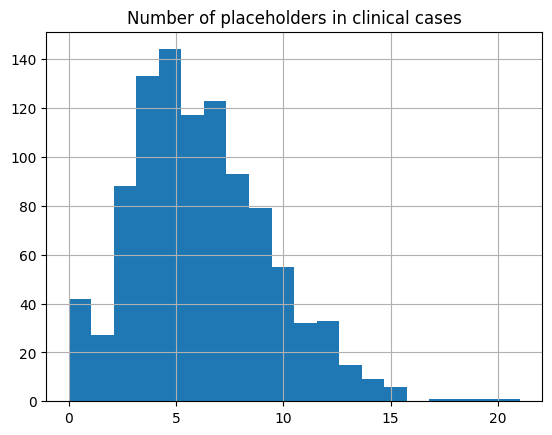

In [43]:
df["n_placeholders"].hist(bins=20)
plt.title("Number of placeholders in clinical cases")

In [47]:
df["cat_ph"] = df["n_placeholders"].apply(lambda x: "0" if x == 0 else "1-5" if x <= 5 else "6-10" if x <= 10 else ">10")

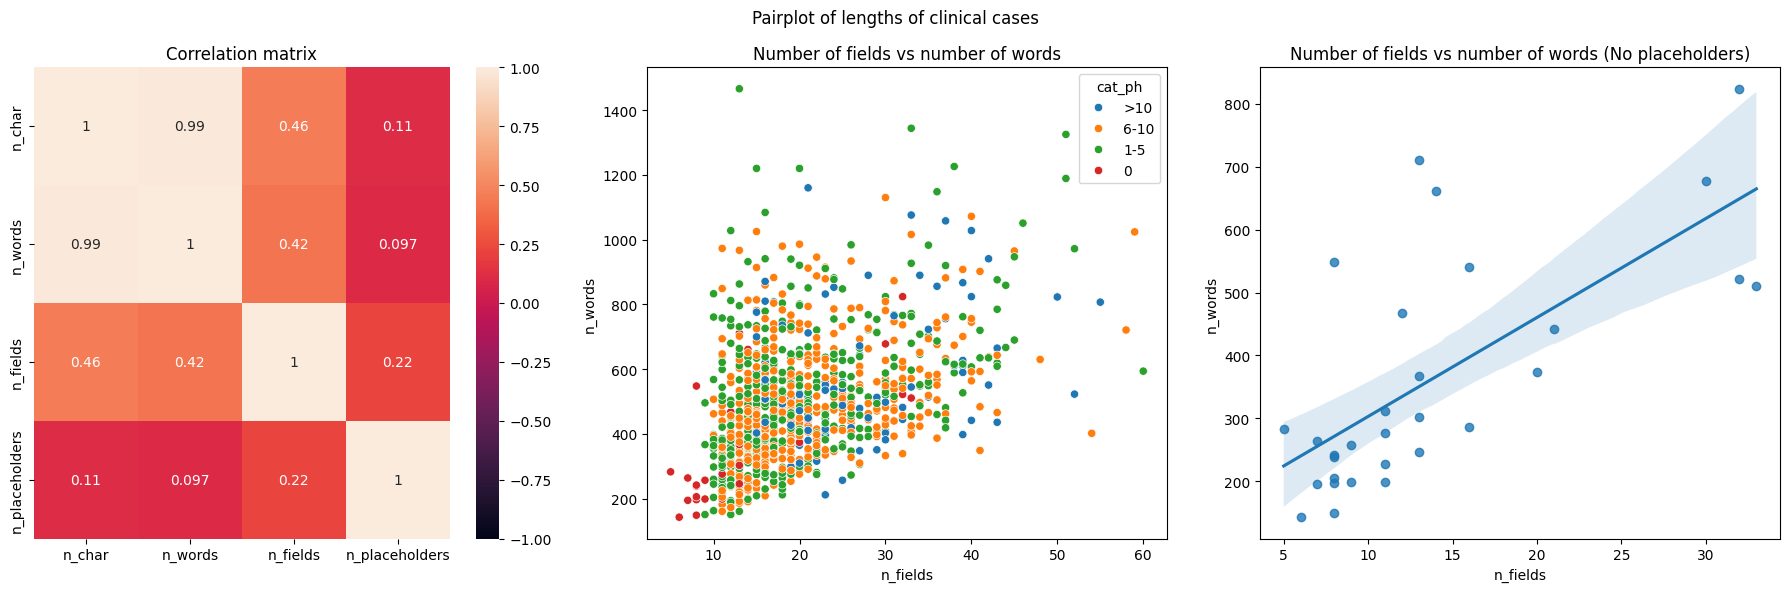

In [63]:
# Heatmap correlation matrix

cols = ["n_char", "n_words", "n_fields", "n_placeholders"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlation matrix")

sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1], hue="cat_ph")
ax[1].set_title("Number of fields vs number of words")

sns.regplot(x="n_fields", y="n_words", data=df[df["n_placeholders"] == 0], ax=ax[2])
ax[2].set_title("Number of fields vs number of words (No placeholders)")

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [64]:
df.describe()

,n_char,n_words,n_fields,n_placeholders
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,3810.204000,508.870000,20.91000,6.384000
std,1444.890979,194.305501,8.85055,3.110019
min,1105.000000,143.000000,5.00000,0.000000
25%,2832.500000,378.750000,14.00000,4.000000
50%,3601.500000,475.000000,19.00000,6.000000
75%,4564.500000,611.000000,25.00000,8.000000
max,10832.000000,1466.000000,60.00000,21.000000
